<a href="https://colab.research.google.com/github/goyalkhushi/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [2]:
df=pd.read_csv('/content/loan_prediction.csv')
print(df.head())
print(df.info())

    Loan_ID Gender Married Dependents  ... Loan_Amount_Term Credit_History  Property_Area  Loan_Status
0  LP001002   Male      No          0  ...            360.0            1.0          Urban            Y
1  LP001003   Male     Yes          1  ...            360.0            1.0          Rural            N
2  LP001005   Male     Yes          0  ...            360.0            1.0          Urban            Y
3  LP001006   Male     Yes          0  ...            360.0            1.0          Urban            Y
4  LP001008   Male      No          0  ...            360.0            1.0          Urban            Y

[5 rows x 13 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents    

In [3]:
print(df.isnull().sum())
print(df.describe())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count       614.000000         614.000000  592.000000         600.00000      564.000000
mean       5403.459283        1621.245798  146.412162         342.00000        0.842199
std        6109.041673        2926.248369   85.587325          65.12041        0.364878
min         150.000000           0.000000    9.000000          12.00000        0.000000
25%        2877.500000           0.000000  100.000000         360.00000        1.000000
50%        3812.500000        1188.500000  128.000000         360.00000        1.000000
75%        5795.000000        2297.250000  168.000000      

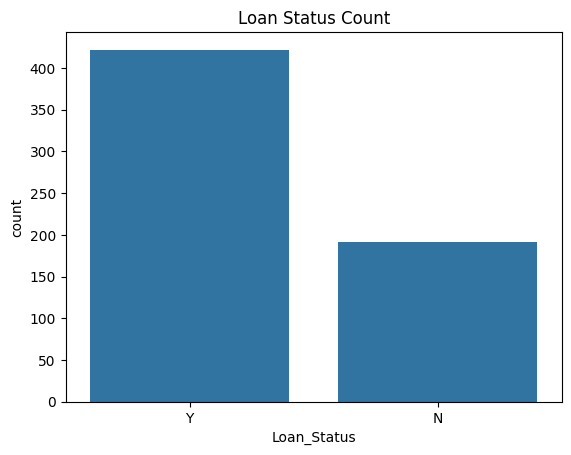

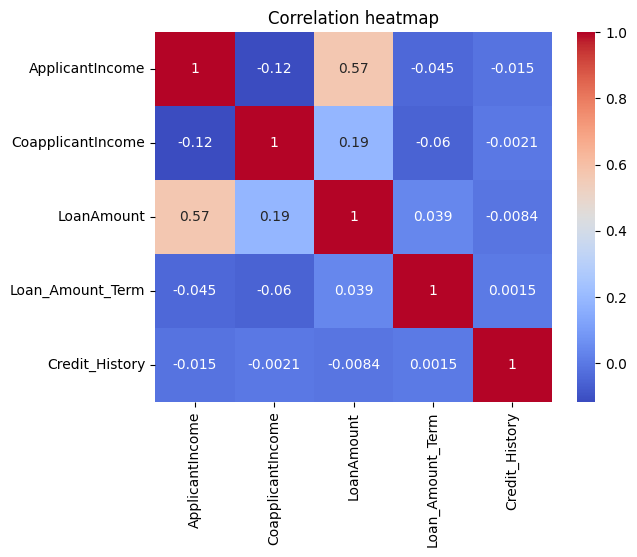

In [12]:
sns.countplot(x='Loan_Status',data=df)
# countplot helps to  count  the approved loan and rejected loan
plt.title('Loan Status Count')
# load status is the target
plt.show()
# Correlation heatmap
# Correlation help to understand between features
num_df=df.select_dtypes(include=np.number)
# here we only select numeric data as our data contains some string also
sns.heatmap(num_df.corr(), annot=True,cmap='coolwarm')
# we use coolwarm color to represnt correlation matrix .Here red show positive
# correlation and dark blue represents negative correlation
plt.title('Correlation heatmap')
plt.show()

In [16]:
# filling missing values
categorical_cols=df.select_dtypes(include=['object']).columns
numeric_cols=df.select_dtypes(include=['int64','float64']).columns
# filling categorical value with mode and numeric with mean
for col in categorical_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

for col in numeric_cols:
  df[col].fillna(df[col].mean(),inplace=True)

le=LabelEncoder()
for col in categorical_cols:
  df[col]=le.fit_transform(df[col])

print(df.head())

   Loan_ID  Gender  Married  ...  Credit_History  Property_Area  Loan_Status
0        0       1        0  ...             1.0              2            1
1        1       1        1  ...             1.0              0            0
2        2       1        1  ...             1.0              2            1
3        3       1        1  ...             1.0              2            1
4        4       1        0  ...             1.0              2            1

[5 rows x 13 columns]


<ipython-input-16-fdafae050f39>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [17]:
# check again if null values is replaced or not
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [19]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


Accuracy Score:0.79


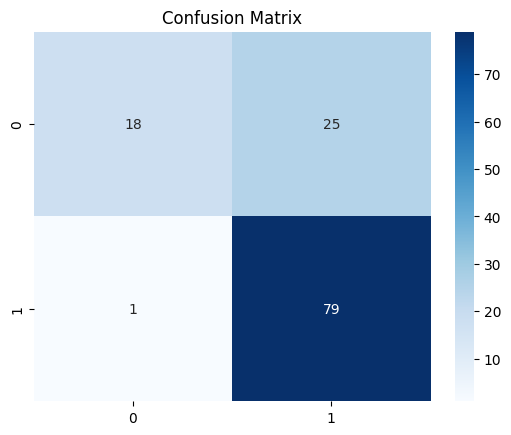

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [22]:
ac=accuracy_score(y_test,y_pred)
print(f'Accuracy Score:{ac:.2f}')
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test,y_pred))

In [23]:
# predict on new data
new_data=np.array([[1,0,0,1,0,5000,0,15000,360,1,1,1]])
new_data_scaled=scaler.transform(new_data)
prediction=model.predict(new_data_scaled)
if prediction[0]==1:
  print('Loan will be approved')
else:
  print('Loan will be rejected')


Loan will be approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
